In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import skimage
import sklearn

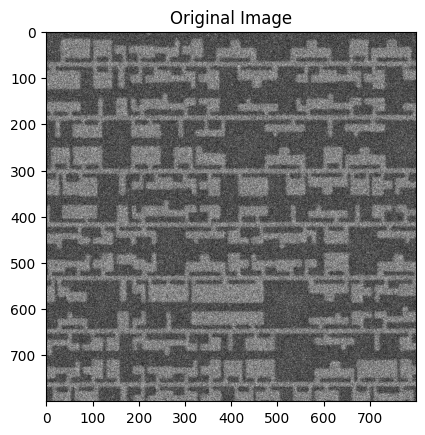

Type <class 'numpy.ndarray'> uint8
Shape (800, 800)
Range 0 - 255


In [2]:
# load and show original image

def imshow(img:np.ndarray, title:str):
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()
    # print image statistics
    print('Type', type(img), img.dtype)
    print('Shape', img.shape)
    print('Range', np.min(img), '-', np.max(img))

original_image = skimage.io.imread('img_0.png')
imshow(original_image, 'Original Image')

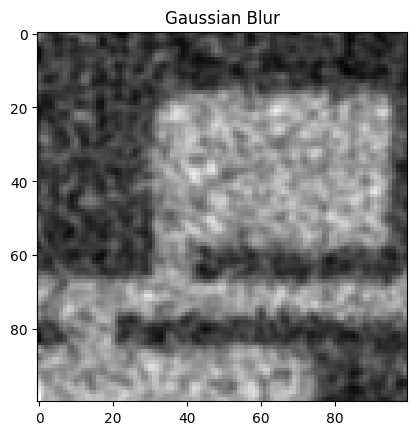

Type <class 'numpy.ndarray'> float64
Shape (100, 100)
Range 0.18701638339792598 - 0.7106708581970249


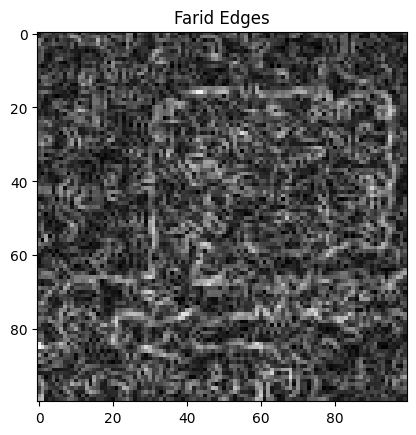

Type <class 'numpy.ndarray'> float64
Shape (100, 100)
Range 0.0003618963572120814 - 0.11310742596480271


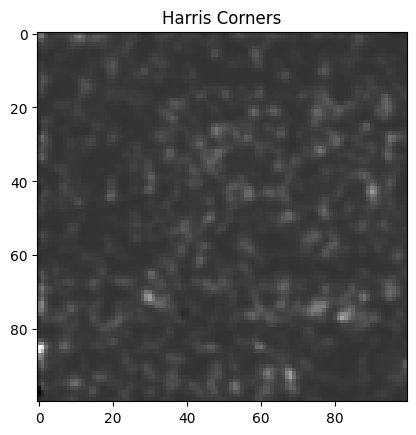

Type <class 'numpy.ndarray'> float64
Shape (100, 100)
Range -0.2331053845414695 - 0.9422119927366289
(640000, 3)


In [3]:
# feature extraction - intensity, edges, corners
intensity = skimage.filters.gaussian(original_image)
imshow(intensity[0:100, 0:100], 'Gaussian Blur')

edges = skimage.filters.farid(original_image)
imshow(edges[0:100, 0:100], 'Farid Edges')

corners = skimage.feature.corner_harris(original_image)
imshow(corners[0:100, 0:100], 'Harris Corners')

# format features
features = np.dstack((intensity, edges, corners))
features = features.reshape(800*800, -1)
print(features.shape)

C:\Users\Olivia\Anaconda3\envs\ic_sem_re_tutorial\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


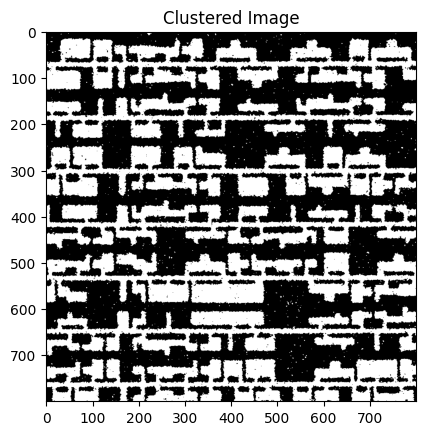

Type <class 'numpy.ndarray'> int32
Shape (800, 800)
Range 0 - 1


In [4]:
# unsupervised ML - kmeans
import sklearn.cluster
model = sklearn.cluster.KMeans(n_clusters=2, random_state=12)
model.fit(features)
clustered_image = model.predict(features)
clustered_image = clustered_image.reshape(800,800)
imshow(clustered_image, 'Clustered Image')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


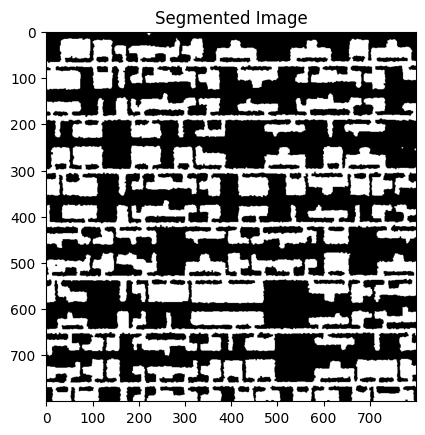

Type <class 'numpy.ndarray'> bool
Shape (800, 800)
Range False - True


In [5]:
# postprocessing - morphological operations 
# input: clustered_image, out: segmentation
structuring_element = np.ones([3,3])
print(structuring_element)
postprocess_image = skimage.morphology.binary_opening(clustered_image, structuring_element)
segmentation = skimage.morphology.binary_closing(postprocess_image, structuring_element)
imshow(segmentation, 'Segmented Image')

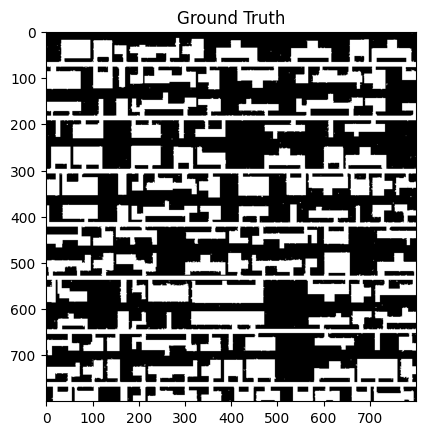

Type <class 'numpy.ndarray'> bool
Shape (800, 800)
Range False - True


In [6]:
# load and show ground truth
ground_truth = skimage.io.imread('gt_0.png').astype('bool')
imshow(ground_truth, 'Ground Truth')

In [7]:
# evaluation - IoU
import sklearn.metrics
iou = sklearn.metrics.jaccard_score(segmentation.flatten(),
                                   ground_truth.flatten())
print('Iou', iou)

Iou 0.8838027684990446


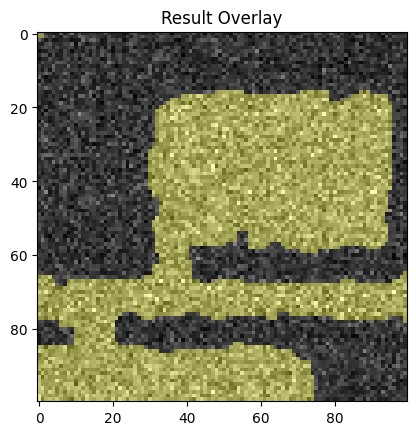

Type <class 'numpy.ndarray'> float64
Shape (100, 100, 3)
Range 0.002745098039215686 - 1.0


In [8]:
# visualize results
visualization = skimage.color.label2rgb(segmentation,
                                       original_image,
                                       ['yellow'])
imshow(visualization[0:100, 0:100], 'Result Overlay')

In [9]:
# model interpretation - cluster centers
for label, model.cluster_center in enumerate(model.cluster_centers_):
    print('label', label, '-', model.cluster_center)
# intensity, edges, corners

label 0 - [0.31547955 0.02810186 0.02922995]
label 1 - [0.50153405 0.03536476 0.0661201 ]
